# TAREA:


# Regresion Lineal 
## Basado en Christensen, L y W. Greene (1976), "Economies of Scale in U.S. Electric Power Generation", Journal of Political Economy, Vol. 84, No. 4, pp. 655-676

A continuación, resuleva cada una las instrucciones que se le señalan

In [19]:
# Importamos Dependencias o Bibliotecas necesarias:
import pyreadstat # librería para leer formato ".dta"
import pandas as pd # librería para manipulación de datos
import numpy as np # Librería para operaciones matemáticas
import matplotlib # Librería para graficar
from matplotlib import pyplot as plt # Librería para graficar
import statsmodels.api as sm # Librería para análisis estadístico
from IPython.display import Image # Librería para importar imagénes
from statsmodels.formula.api import ols # Librería para pruebas de hipotesis

### La base de datos contiene información de 100 empresa de generación eléctrica, reportada en las siguientes variables:

* **firmid:** ID de la empresa
* **costs:** Total costs in MM USD
* **output:** output billion KwH
* **plabor:** price of labor
* **pfuel:** price of fuel
* **pkap:** price of capital
* **labshr:** participación del trabajo en el costo
* **kapshr:** participación del capital en el costo

## 1. Importe la base de DATOS:

In [20]:
# Ruta al archivo:
dtafile = 'Data/cgreene76.dta'
# La función read_dat devuelve dos objetos: el dataframe y los metadatos
dataframe , meta = pyreadstat.read_dta(dtafile)

In [21]:
# Muestre los datos importados
print(dataframe.head(10))


   firmid   costs  output       plabor       pkap      pfuel  labshr  kapshr
0     1.0  0.2130     8.0  6869.470215  64.945000  18.000000  0.3291  0.4197
1    20.0  0.4887    14.0  5438.890137  86.110001  34.150002  0.2994  0.4571
2    17.0  0.6159    50.0  9204.240234  90.470001  32.070000  0.2963  0.0981
3    14.0  0.7606    65.0  8971.889648  41.243000  28.539000  0.2802  0.1282
4    28.0  0.6363    67.0  6696.500000  58.257999  25.400000  0.2447  0.3674
5    22.0  1.1474    90.0  7189.669922  79.100998  21.503000  0.2855  0.2073
6    16.0  1.3422   183.0  5063.490234  74.430000  35.509998  0.0960  0.2629
7    15.0  2.2587   295.0  8218.400391  71.940002  39.200001  0.1772  0.1623
8    27.0  2.0532   374.0  7884.939941  82.458000  26.301399  0.2054  0.1208
9    30.0  3.1504   378.0  7895.430176  60.277000  42.468300  0.0980  0.1996


# Considere una función de costos del tipo translog, escrita como:

$$ln(C) = \alpha_0 +  \alpha_Y ln(Y) + \frac{1}{2} \gamma_{YY} (ln(Y))^2 + \sum_k \alpha_k ln(P_{k}) + \frac{1}{2} \sum_k \sum_j \gamma_{kj} ln(P_k) ln(P_j) + \sum_k \gamma_{Yk} ln(Y) ln(P_k) + \varepsilon_i$$

Este ecuación es equivalente a la que Christensen y Greene denominan Modelo A. Donde:
$\gamma_{kj} = \gamma_{jk}$, $C$ es el costo total, $Y$ es el producto, $P_k$'s son los precios de los factores. 

## 2. Realice las transformaciones necesarias en los datos para estimar la ecuación anterior:

In [22]:
dataframe['Ltotcost'] = np.log(dataframe['costs'])
dataframe['Loutput'] = np.log(dataframe['output'])
dataframe["Loutput_2"] = dataframe["Loutput"]**2
dataframe['Lplabor'] = np.log(dataframe['plabor'])
dataframe['Lpfuel'] = np.log(dataframe['pfuel'])
dataframe['Lpkap'] = np.log(dataframe['pkap'])
dataframe['Lpprod'] = np.dot(dataframe['plabor'] , dataframe['pfuel'])
dataframe['Loutpfuel'] = np.dot(dataframe['Loutput'] , dataframe['pfuel'])
dataframe['One'] = 1


In [23]:
# Muestre su data frame con las variables adicionales necesarias
dataframe.head()

,firmid,costs,output,plabor,pkap,pfuel,labshr,kapshr,Ltotcost,Loutput,Loutput_2,Lplabor,Lpfuel,Lpkap,Lpprod,Loutpfuel,One
0,1.0,0.2130,8.0,6869.470215,64.945000,18.000000,0.3291,0.4197,-1.546463,2.079442,4.324077,8.834842,2.890372,4.173541,2.427671e+07,24982.580173,1
1,20.0,0.4887,14.0,5438.890137,86.110001,34.150002,0.2994,0.4571,-0.716006,2.639057,6.964624,8.601330,3.530763,4.455626,2.427671e+07,24982.580173,1
2,17.0,0.6159,50.0,9204.240234,90.470001,32.070000,0.2963,0.0981,-0.484671,3.912023,15.303924,9.127420,3.467921,4.505018,2.427671e+07,24982.580173,1
3,14.0,0.7606,65.0,8971.889648,41.243000,28.539000,0.2802,0.1282,-0.273648,4.174387,17.425509,9.101852,3.351272,3.719481,2.427671e+07,24982.580173,1
4,28.0,0.6363,67.0,6696.500000,58.257999,25.400000,0.2447,0.3674,-0.452085,4.204693,17.679440,8.809340,3.234749,4.064881,2.427671e+07,24982.580173,1


## 3. Realice la estimación de la regresión de la función translog: 

In [24]:
# Definición de vector y matriz: Y y X
Y = dataframe["Ltotcost"]
X = dataframe[["One","Loutput","Loutput_2", "Lplabor", "Lpfuel", "Lpkap","Lpprod","Loutpfuel"]]

In [25]:
# Resporte de la estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())


print("\n Parametros \n ",est2.params)
print("\n Valores \n", est2.tvalues)
print("\n Fvalue \n", est2.fvalue)




                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2173.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.20e-94
Time:                        23:49:07   Log-Likelihood:                 58.552
No. Observations:                  99   AIC:                            -105.1
Df Residuals:                      93   BIC:                            -89.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One        -1.269e-14   1.55e-15     -8.191      0.0

## 4. Pruebe cada una de las siguientes hipótesis 

En cada caso escriba sus conclusiones respecto a la prueba y qué significado tiene para la estimación, de acuerdo con el trabajo de Christensen y Greene (1976)

In [29]:
# Establecemos la formula de la ecuación estimada:
formula = 'Ltotcost ~  One + Loutput  + Lplabor + Lpfuel + Lpkap + Lpprod + Loutpfuel'
results = ols(formula, dataframe).fit()




### 4.1
$$H_0: \sum_k \alpha_k = 1$$

In [32]:
# Establecemos la hipótesis
hypotheses = 'Lplabor + Lpfuel + Lpkap = 1'


In [33]:
# Prueba de la hipótesis:
t_test = results.t_test(hypotheses)
print(t_test)
f_test = results.f_test(hypotheses)
print(f_test)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0740      0.207      0.358      0.721       0.664       1.484
<F test: F=array([[0.12826523]]), p=0.7210405420675796, df_denom=94, df_num=1>


### 4.2
$$H_0: \sum_k \gamma_{Yk} = 0$$

In [46]:
# Establecemos la hipótesis
hypotheses_2 = 'Lplabor + Lpfuel + Lpkap = 1, Loutpfuel = 0'


In [47]:
# Prueba de la hipótesis:
t_test = results.t_test(hypotheses_2)
print(t_test)
f_test = results.f_test(hypotheses_2)
print(f_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0740      0.207      0.358      0.721       0.664       1.484
c1         -3.638e-10    5.9e-11     -6.162      0.000   -4.81e-10   -2.47e-10
<F test: F=array([[0.12826523]]), p=0.7210405420675796, df_denom=94, df_num=1>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


### 4.3
$$H_0: \sum_{k} \gamma_{kj} = \sum_{j} \gamma_{kj} = \sum_{k} \sum_{j} \gamma_{kj} = 0$$

In [48]:
# Establecemos la hipótesis
hypotheses_3 = 'Lplabor + Lpfuel + Lpkap = 1, Lpprod = 0'


In [49]:
# Prueba de la hipótesis:
t_test = results.t_test(hypotheses_3)
print(t_test)
f_test = results.f_test(hypotheses_3)
print(f_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0740      0.207      0.358      0.721       0.664       1.484
c1         -3.521e-07   5.74e-08     -6.130      0.000   -4.66e-07   -2.38e-07
<F test: F=array([[102.07913061]]), p=2.7416202975810717e-24, df_denom=94, df_num=2>


## 5. Dadas sus conclusiones en las pruebas de hipótesis anteriores, ¿considere si debe ajustar la función de costos del tipo translog descrita anteriormente?, en su caso ajuste la siguiente expresión a la forma que debería estimar:

$$ln(C) = \alpha_0 +  \alpha_Y ln(Y) + \frac{1}{2} \gamma_{YY} (ln(Y))^2 + \sum_k \alpha_k ln(P_{k}) + \frac{1}{2} \sum_k \sum_j \gamma_{kj} ln(P_k) ln(P_j) + \sum_k \gamma_{Yk} ln(Y) ln(P_k) + \varepsilon_i$$

## Estime la nueva propuesta

In [40]:
# Definición de vector y matriz: Y y X
Y = ["Ltotcost"]
X = [["One","Loutput", "Lplabor", "Lpfuel", "Lpkap", , , ,]]
#
X

SyntaxError: invalid syntax (<ipython-input-40-da68cb8f9ed1>, line 3)

In [50]:
# Resporte de la estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     87.06
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.56e-33
Time:                        23:54:09   Log-Likelihood:                -452.18
No. Observations:                  99   AIC:                             916.4
Df Residuals:                      93   BIC:                             931.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One        -4.482e-14    2.7e-13     -0.166      0.8

## 6. Determine el valor del Costo Total Estimado y el Costo Medio Estimado considerado cualquiera de las estimaciones que considere pertinente

In [42]:
# Rcuperamos de la regresión el valor del Log del costo estimado
LY_pred = est2.predict(X)
# Anti-log:
Y = np.exp(LY_pred)
# Colocamos en el Data Frame:
dataframe['avgcost'] = dataframe["costs"]/dataframe["output"]
dataframe['totcost_e'] = Y
dataframe['avgcost_e'] = dataframe["totcost_e"]/dataframe["output"]
dataframe.head()


,firmid,costs,output,plabor,pkap,pfuel,labshr,kapshr,Ltotcost,Loutput,Loutput_2,Lplabor,Lpfuel,Lpkap,Lpprod,Loutpfuel,One,avgcost,totcost_e,avgcost_e
0,1.0,0.2130,8.0,6869.470215,64.945000,18.000000,0.3291,0.4197,-1.546463,2.079442,4.324077,8.834842,2.890372,4.173541,2.427671e+07,24982.580173,1,0.026625,0.197823,0.024728
1,20.0,0.4887,14.0,5438.890137,86.110001,34.150002,0.2994,0.4571,-0.716006,2.639057,6.964624,8.601330,3.530763,4.455626,2.427671e+07,24982.580173,1,0.034907,0.373111,0.026651
2,17.0,0.6159,50.0,9204.240234,90.470001,32.070000,0.2963,0.0981,-0.484671,3.912023,15.303924,9.127420,3.467921,4.505018,2.427671e+07,24982.580173,1,0.012318,0.846654,0.016933
3,14.0,0.7606,65.0,8971.889648,41.243000,28.539000,0.2802,0.1282,-0.273648,4.174387,17.425509,9.101852,3.351272,3.719481,2.427671e+07,24982.580173,1,0.011702,0.854621,0.013148
4,28.0,0.6363,67.0,6696.500000,58.257999,25.400000,0.2447,0.3674,-0.452085,4.204693,17.679440,8.809340,3.234749,4.064881,2.427671e+07,24982.580173,1,0.009497,0.754966,0.011268


## 7. Gráfique su estimación de Costo Medio y el Costo Medio observado

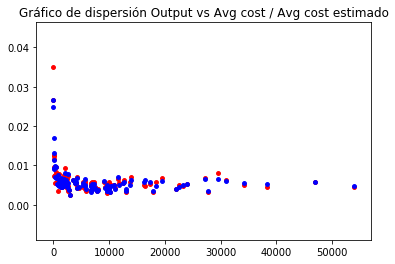

In [44]:
# graficamos resultados:

plt.scatter(dataframe.output, dataframe.avgcost, s = 15, color ="red")
plt.scatter(dataframe.output, dataframe.avgcost_e, s = 15, color ="blue")
plt.title("Gráfico de dispersión Output vs Avg cost / Avg cost estimado")
#
#
plt.show()


## 8. Guarde el Data Frame en un archivo CSV:

In [45]:
dataframe.to_csv('guardar.csv')